In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = "svg"
import sys
sys.version

'3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]'

In [2]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')

In [3]:
#Importing the dataset

In [3]:
raw_df.head() 

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [5]:
#3. Getting Basic Information about the Dataset

In [4]:
raw_df.shape 

(12032, 12)

In [5]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [7]:
#Cleaning the Dataset Removing the redundunt rows of data

In [8]:
wrong_data = raw_df['Dining Rating'] == 'Dining Rating' 
raw_df[wrong_data] 

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [9]:
raw_df = raw_df[~wrong_data] 

In [10]:
raw_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [11]:
raw_df.drop(['Zomato URL'], axis = 1, inplace=True) 

In [12]:
raw_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [13]:
raw_df.isnull().sum() 

Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [15]:
raw_df.fillna('NaN', inplace=True) 

In [ ]:
#c. Converting the DataTypes of numerical columns to numeric dataype

In [16]:
raw_df['Price for 2'].value_counts()

Price for 2
300.0    2014
200.0    1970
400.0    1343
250.0    1115
500.0    1064
         ... 
360.0       1
180.0       1
390.0       1
240.0       1
330.0       1
Name: count, Length: 64, dtype: int64

In [29]:
raw_df['Dining Rating'].value_counts()

Dining Rating
NaN    5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [30]:
raw_df['Dining Rating'].replace(to_replace=['NaN'], value='0', inplace=True) 

In [18]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
1893                            1
742                             1
1363                            1
1094                            1
1266                            1
Name: count, Length: 794, dtype: int64

In [20]:
raw_df['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews'], value='0', inplace=True) 

In [21]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
NaN    5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
1.8       5
2.3       5
2.0       5
2.2       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [23]:
raw_df['Delivery Rating'].replace(to_replace=['NaN'], value='0', inplace=True) 

In [24]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NaN                             220
27                               34
22                               30
                               ... 
39600                             1
21700                             1
4320                              1
24700                             1
10500                             1
Name: count, Length: 2282, dtype: int64

In [26]:
raw_df['Delivery Rating Count'].replace(to_replace=['Not enough Delivery Reviews','Does not offer Delivery','NaN'], value='0', inplace=True) 

In [31]:
raw_df['Price for 2'] = raw_df['Price for 2'].astype('int64') 
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('int64') 
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('float64') 
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('int64') 
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype('float64') 

In [32]:
raw_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Address                12032 non-null  object 
 2   Location               12032 non-null  object 
 3   Cuisine                12032 non-null  object 
 4   Top Dishes             12032 non-null  object 
 5   Price for 2            12032 non-null  int64  
 6   Dining Rating          12032 non-null  int64  
 7   Dining Rating Count    11812 non-null  float64
 8   Delivery Rating        12032 non-null  int64  
 9   Delivery Rating Count  12032 non-null  float64
 10  Features               12032 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.0+ MB


In [ ]:
#Removing the restaurant records whose Rating or Votes is 0

In [34]:
useless_data = (raw_df['Delivery Rating'] == 0.0) | (raw_df['Delivery Rating'] == 0) 
raw_df[useless_data] 

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300,4,1094.0,0,0.0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"142, Phoenix Marketcity, New NGO Colony, Vela...","Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000,4,354.0,0,0.0,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,"80/29, 2nd Main Road, RA Puram, Chennai",RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500,4,464.0,0,0.0,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
85,Bazaar - All Day Diner - Grand by GRT Hotels,"Grand by GRT Hotels, 120, Sir Thyagaraya Road...",Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...","['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...",2500,4,1198.0,0,0.0,"['Breakfast', 'Home Delivery', 'Serves Alcohol..."
89,Coal Barbecues,"Shop 17 & 18, Rajalakshmi Nagar, 7th Cross St...",Velachery,"['North Indian', ' Chinese']","['Chicken Honey', ' Fish', ' Prawn', ' Waffles...",1400,4,9410.0,0,0.0,"['Indoor Seating', 'Buffet', 'Table reservatio..."
...,...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350,0,NaN,0,0.0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350,0,NaN,0,0.0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350,0,NaN,0,0.0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350,0,NaN,0,0.0,"['Breakfast', 'Delivery Only']"


In [35]:
raw_df = raw_df[~useless_data] 

In [ ]:
#Working on 'RATING_TYPE' Column

In [36]:
raw_df['Dining Rating'].value_counts() 

Dining Rating
3    3066
0    1793
4     677
2     632
1       5
Name: count, dtype: int64

In [37]:
raw_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4,1500.0,4,9306.0,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4,3059.0,4,39200.0,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4,1361.0,4,10500.0,"['Home Delivery', 'Indoor Seating']"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500,4,1101.0,4,11200.0,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4,617.0,4,22400.0,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...
11901,Dhabba On Wheels,"5/336, Old Mahabalipuram Road, Okkiyampet, Ch...",Okkiyampet,['North Indian'],Invalid,500,0,0.0,3,54.0,"['Home Delivery', 'Indoor Seating']"
11914,Sandwich Sisters,"137, Velachery Main Road, Velachery, Chennai",Velachery,['Sandwich'],Invalid,200,0,0.0,3,75.0,"['Home Delivery', 'Free Parking']"
11953,The Sandwich Box,"2/72, Nehru Street, Navalur, Navallur, Chennai",Navallur,"['Sandwich', ' Fast Food', ' Beverages']",Invalid,300,0,0.0,3,21.0,"['Home Delivery', 'Indoor Seating']"
11959,The Shangai Story,"Senthamil Nagar, Vengaivasal, Medavakkam, Che...",Madipakkam,['Chinese'],Invalid,350,0,0.0,2,17.0,['Delivery Only']


In [38]:
raw_df['Location'].value_counts() 

Location
Velachery                                                   214
Porur                                                       208
Anna Nagar East                                             191
T. Nagar                                                    166
Ambattur                                                    162
                                                           ... 
Hotel Sudhara, T. Nagar                                       1
Eat And Pack, Ambattur                                        1
RMZ Millenia Business Park, Old Mahabalipuram Road (OMR)      1
Spectrum The Grand Venus Mall, Perambur                       1
Hotel Chennai Deluxe, Koyambedu                               1
Name: count, Length: 162, dtype: int64

In [39]:
raw_df[raw_df.duplicated()]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [ ]:
#Performing Exploratory Data Analysis 
Q1) How many restaurants are in Mumbai for each type of cuisine?


In [40]:
!{sys.executable} -m pip install -U kaleido

In [41]:
!{sys.executable} -m pip install -U plotly

In [42]:
import plotly.express as px

fig = px.histogram(raw_df,x='Dining Rating',color='Dining Rating',title='No. of Restaurants by Cuisine Type',labels={'Cuisine': 'Cuisine Type'})


In [43]:
fig.write_image("Dining Rating.png")

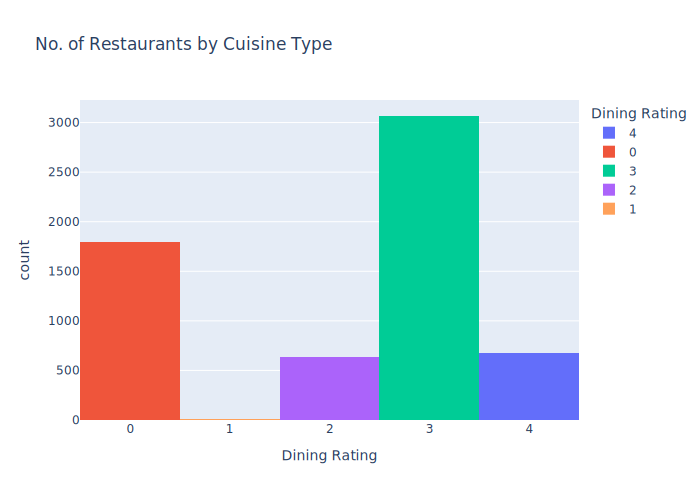

In [44]:
fig

In [45]:
raw_df = raw_df['Dining Rating'].value_counts().reset_index() 
raw_df.rename(columns={'index':'Dining Rating', 'Dining Rating':'COUNT OF RESTAURANTS'}, inplace=True)

In [46]:
raw_df

,COUNT OF RESTAURANTS,count
0,3,3066
1,0,1793
2,4,677
3,2,632
4,1,5


In [47]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [48]:

fig = px.pie(raw_df, names='Dining Rating',values='COUNT OF RESTAURANTS',title='Percentage of Restaurants by Rating Type')

fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['COUNT OF RESTAURANTS', 'count'] but received: Dining Rating